In [374]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os


In [375]:
# 2021년도 상반기 한국전력공사 전기차충전소충전량 파일을 불러옵니다.

chardata2101_df = pd.read_csv('data/한국전력공사_전기차충전소충전량(202101_202106).csv', encoding = 'cp949')

In [376]:
# 2021년도 상반기 한국전력공사 전기차충전소충전량 파일에서 필요없는 ['충전기ID'] 컬럼을 제거합니다.

chardata2101_df.drop(columns = ['충전기ID'], inplace = True)

In [377]:
chardata2101_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
0,인천,김포,운양동 전원마을월드2단지,급속01,경기도 김포시 전원로 44,급속,50.0,28.92,0,49,2021-01-01,2021-01-01 21:34:13,2021-01-01 22:23:44
1,인천,시흥,LH퍼스트리움 아파트,완속03,경기도 시흥시 동서로 1068 (조남동),완속,7.0,12.51,3,55,2021-01-01,2021-01-01 18:28:55,2021-01-01 22:24:38
2,남서울,강남,LH강남힐스테이트,급속01,서울특별시 강남구 자곡동 자곡로3길 21,급속,50.0,26.37,0,38,2021-01-01,2021-01-01 21:46:05,2021-01-01 22:24:33
3,강원,강릉,알펜시아리조트,급속02,강원도 평창군 대관령면 솔봉로 325,급속,50.0,39.12,0,53,2021-01-01,2021-01-01 16:12:09,2021-01-01 17:05:27
4,대전세종충남,서대전,대전시립연정국악원 주차장,급속02,대전광역시 서구 둔산대로 181,급속,50.0,30.42,0,42,2021-01-01,2021-01-01 23:14:50,2021-01-01 23:57:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,서울,광진성동,금호자이1차,완속01,서울특별시 성동구 금호동2가 금호로 117,완속,7.0,0.64,0,11,2021-05-15,2021-05-15 18:09:05,2021-05-15 18:20:05
1048571,제주,제주직할,제주정든마을1단지LH 아파트,완속03,제주특별자치도 제주시 노형동 정존11길 54,완속,7.0,15.15,2,19,2021-05-15,2021-05-15 16:00:44,2021-05-15 18:20:07
1048572,제주,제주직할,제주공항,급속03,제주특별자치도 제주시 용담2동 1950-5,급속,50.0,5.72,0,16,2021-05-15,2021-05-15 18:04:10,2021-05-15 18:20:51
1048573,서울,마포용산,마포한강2차 푸르지오아파트,완속01,"서울특별시 마포구 월드컵로3길 14 (합정동, 마포 한강 2차 푸르지오)",완속,7.0,14.88,2,49,2021-05-15,2021-05-15 15:09:00,2021-05-15 17:58:11


In [378]:
# 2021년도 상반기 전기차충전소충전량 파일에서 주소가 광주광역시인 데이터를 기준으로 광주광역시 데이터 프레임을 저장합니다.

chardatagj2101_df = chardata2101_df[chardata2101_df['주소'].str.contains('광주광역시', na = False)]

In [379]:
chardatagj2101_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
63,광주전남,광산,수완 우미린 1차아파트,완속02,"광주광역시 광산구 수완로33번길 22 (수완동, 수완1차우미린아파트)",완속,7.0,29.9500,5,10,2021-01-01,2021-01-01 18:44:57,2021-01-01 23:54:58
80,광주전남,광주전남직할,장등공용차고지,급속03,광주광역시 북구 장운길 55 (장등동),급속,200.0,14.3105,0,17,2021-01-01,2021-01-01 22:05:59,2021-01-01 22:23:37
81,광주전남,서광주,보훈병원 주차장,급속01,"광주광역시 남구 서문대로824번길 10 (주월동, (구)광주보훈병원)",급속,50.0,27.3800,1,41,2021-01-01,2021-01-01 18:42:59,2021-01-01 20:24:58
84,광주전남,광주전남직할,장등공용차고지,급속04,광주광역시 북구 장운길 55 (장등동),급속,200.0,65.2295,0,40,2021-01-01,2021-01-01 21:46:13,2021-01-01 22:26:25
94,광주전남,광주전남직할,일곡롯데아파트,완속02,"광주광역시 북구 설죽로 595 (일곡동, 롯데아파트)",완속,7.0,20.4300,3,46,2021-01-01,2021-01-01 19:52:29,2021-01-01 23:38:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048324,광주전남,서광주,상무버들1단지,급속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",급속,50.0,13.8200,0,39,2021-05-15,2021-05-15 16:59:59,2021-05-15 17:39:50
1048332,광주전남,광산,수완2차호반베르디움,급속01,"광주광역시 광산구 풍영로329번길 19 (장덕동, 수완지구 호반베르디움 2차아파트)",급속,50.0,22.5400,1,7,2021-05-15,2021-05-15 19:36:12,2021-05-15 20:43:55
1048365,광주전남,광산,광주도시철도공사,급속01,광주광역시 광산구 월전로 67 (월전동),급속,50.0,22.4500,0,36,2021-05-15,2021-05-15 14:34:52,2021-05-15 15:11:42
1048478,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,27.7000,0,42,2021-05-15,2021-05-15 14:55:16,2021-05-15 15:37:53


In [380]:
# 2021년도 하반기 한국전력공사 전기차충전소충전량 파일을 불러옵니다.

chardata2102_df = pd.read_csv('data/한국전력공사_전기차충전소충전량(202107_202112).csv', encoding = 'cp949')

In [381]:
# 2021년도 하반기 한국전력공사 전기차충전소충전량 파일에서 필요없는 ['충전기ID'] 컬럼을 제거합니다.

chardata2102_df.drop(columns = ['충전기ID'], inplace = True)

In [382]:
# 2021년도 하반기 전기차충전소충전량 파일에서 주소가 광주광역시인 데이터를 기준으로 광주광역시 데이터 프레임을 저장합니다.

chardatagj2102_df = chardata2102_df[chardata2102_df['주소'].str.contains('광주광역시', na = False)]

In [383]:
chardatagj2102_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
25,광주전남,광주전남직할,월남 호반베르디움2차,완속05,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,31.99,5,11,2021-07-01,2021-06-30 21:52:40,2021-07-01 03:04:23
85,광주전남,광산,첨단3-2차호반리젠시빌,급속01,"광주광역시 광산구 첨단중앙로68번길 100 (산월동, 첨단3-2차 호반리젠시빌)",급속,50.0,57.22,1,32,2021-07-01,2021-07-01 19:07:24,2021-07-01 20:40:21
175,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,19.61,0,56,2021-07-01,2021-07-01 06:48:32,2021-07-01 07:44:58
176,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,58.79,9,49,2021-07-01,2021-06-30 21:52:56,2021-07-01 07:42:28
220,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,16.62,0,18,2021-07-01,2021-07-01 19:12:28,2021-07-01 19:31:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048451,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,35.55,0,40,2021-10-17,2021-10-17 11:22:58,2021-10-17 12:03:47
1048453,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,28.49,0,17,2021-10-17,2021-10-17 11:55:10,2021-10-17 12:12:11
1048456,광주전남,광산,수완동 행정복지센터,급속01,"광주광역시 광산구 장덕로 158 (수완동, 수완동행정복지센터/수완보건지소)",급속,50.0,68.78,2,14,2021-10-17,2021-10-17 10:19:13,2021-10-17 12:33:33
1048493,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,50.99,0,59,2021-10-17,2021-10-17 07:22:48,2021-10-17 08:22:10


In [384]:
# 2021년도 상반기 광주광역시 '구' 컬럼 생성을 위한 주소 분리 작업을 실시합니다.

chardatagj2101_df['주소'].str.split(" ", expand = True)

,0,1,2,3,4,5,6,7,8,9
63,광주광역시,광산구,수완로33번길,22,"(수완동,",수완1차우미린아파트),None,None,None,None
80,광주광역시,북구,장운길,55,(장등동),None,None,None,None,None
81,광주광역시,남구,서문대로824번길,10,"(주월동,",(구)광주보훈병원),None,None,None,None
84,광주광역시,북구,장운길,55,(장등동),None,None,None,None,None
94,광주광역시,북구,설죽로,595,"(일곡동,",롯데아파트),None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
1048324,광주광역시,서구,상무버들로40번길,14,"(유촌동,",상무버들마을1주공아파트),None,None,None,None
1048332,광주광역시,광산구,풍영로329번길,19,"(장덕동,",수완지구,호반베르디움,2차아파트),None,None
1048365,광주광역시,광산구,월전로,67,(월전동),None,None,None,None,None
1048478,광주광역시,서구,불암길,154,(매월동),None,None,None,None,None


In [385]:
# '구' 컬럼을 생성합니다.

chardatagj2101_df['구'] = chardatagj2101_df['주소'].str.split(" ",expand=True)[1]

C:\Users\admin\AppData\Local\Temp\ipykernel_15820\1415100948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chardatagj2101_df['구'] = chardatagj2101_df['주소'].str.split(" ",expand=True)[1]


In [386]:
chardatagj2101_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
63,광주전남,광산,수완 우미린 1차아파트,완속02,"광주광역시 광산구 수완로33번길 22 (수완동, 수완1차우미린아파트)",완속,7.0,29.9500,5,10,2021-01-01,2021-01-01 18:44:57,2021-01-01 23:54:58,광산구
80,광주전남,광주전남직할,장등공용차고지,급속03,광주광역시 북구 장운길 55 (장등동),급속,200.0,14.3105,0,17,2021-01-01,2021-01-01 22:05:59,2021-01-01 22:23:37,북구
81,광주전남,서광주,보훈병원 주차장,급속01,"광주광역시 남구 서문대로824번길 10 (주월동, (구)광주보훈병원)",급속,50.0,27.3800,1,41,2021-01-01,2021-01-01 18:42:59,2021-01-01 20:24:58,남구
84,광주전남,광주전남직할,장등공용차고지,급속04,광주광역시 북구 장운길 55 (장등동),급속,200.0,65.2295,0,40,2021-01-01,2021-01-01 21:46:13,2021-01-01 22:26:25,북구
94,광주전남,광주전남직할,일곡롯데아파트,완속02,"광주광역시 북구 설죽로 595 (일곡동, 롯데아파트)",완속,7.0,20.4300,3,46,2021-01-01,2021-01-01 19:52:29,2021-01-01 23:38:58,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048324,광주전남,서광주,상무버들1단지,급속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",급속,50.0,13.8200,0,39,2021-05-15,2021-05-15 16:59:59,2021-05-15 17:39:50,서구
1048332,광주전남,광산,수완2차호반베르디움,급속01,"광주광역시 광산구 풍영로329번길 19 (장덕동, 수완지구 호반베르디움 2차아파트)",급속,50.0,22.5400,1,7,2021-05-15,2021-05-15 19:36:12,2021-05-15 20:43:55,광산구
1048365,광주전남,광산,광주도시철도공사,급속01,광주광역시 광산구 월전로 67 (월전동),급속,50.0,22.4500,0,36,2021-05-15,2021-05-15 14:34:52,2021-05-15 15:11:42,광산구
1048478,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,27.7000,0,42,2021-05-15,2021-05-15 14:55:16,2021-05-15 15:37:53,서구


In [387]:
# 2021년도 하반기 광주광역시 '구' 컬럼 생성을 위한 주소 분리 작업을 실시합니다.

chardatagj2102_df['주소'].str.split(" ", expand = True)

,0,1,2,3,4,5,6,7,8,9
25,광주광역시,동구,남문로,307,"(월남동,",월남호반베르디움,2차),None,None,None
85,광주광역시,광산구,첨단중앙로68번길,100,"(산월동,",첨단3-2차,호반리젠시빌),None,None,None
175,광주광역시,북구,불태3로,3,(월출동),None,None,None,None,None
176,광주광역시,광산구,풍영로170번길,39-10,"(장덕동,",성덕마을,대방노블랜드3차),None,None,None
220,광주광역시,북구,불태3로,3,(월출동),None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
1048451,광주광역시,서구,불암길,154,(매월동),None,None,None,None,None
1048453,광주광역시,북구,장운길,55,(장등동),None,None,None,None,None
1048456,광주광역시,광산구,장덕로,158,"(수완동,",수완동행정복지센터/수완보건지소),None,None,None,None
1048493,광주광역시,서구,불암길,154,(매월동),None,None,None,None,None


In [388]:
# '구' 컬럼을 생성합니다.

chardatagj2102_df['구'] = chardatagj2102_df['주소'].str.split(" ",expand=True)[1]

C:\Users\admin\AppData\Local\Temp\ipykernel_15820\2333330620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chardatagj2102_df['구'] = chardatagj2102_df['주소'].str.split(" ",expand=True)[1]


In [389]:
chardatagj2102_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
25,광주전남,광주전남직할,월남 호반베르디움2차,완속05,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,31.99,5,11,2021-07-01,2021-06-30 21:52:40,2021-07-01 03:04:23,동구
85,광주전남,광산,첨단3-2차호반리젠시빌,급속01,"광주광역시 광산구 첨단중앙로68번길 100 (산월동, 첨단3-2차 호반리젠시빌)",급속,50.0,57.22,1,32,2021-07-01,2021-07-01 19:07:24,2021-07-01 20:40:21,광산구
175,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,19.61,0,56,2021-07-01,2021-07-01 06:48:32,2021-07-01 07:44:58,북구
176,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,58.79,9,49,2021-07-01,2021-06-30 21:52:56,2021-07-01 07:42:28,광산구
220,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,16.62,0,18,2021-07-01,2021-07-01 19:12:28,2021-07-01 19:31:08,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048451,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,35.55,0,40,2021-10-17,2021-10-17 11:22:58,2021-10-17 12:03:47,서구
1048453,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,28.49,0,17,2021-10-17,2021-10-17 11:55:10,2021-10-17 12:12:11,북구
1048456,광주전남,광산,수완동 행정복지센터,급속01,"광주광역시 광산구 장덕로 158 (수완동, 수완동행정복지센터/수완보건지소)",급속,50.0,68.78,2,14,2021-10-17,2021-10-17 10:19:13,2021-10-17 12:33:33,광산구
1048493,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,50.99,0,59,2021-10-17,2021-10-17 07:22:48,2021-10-17 08:22:10,서구


In [390]:
# 2021년도 상반기 데이터 중 중복 값 없는 데이터를 위한 사전작업을 진행합니다. (데이터 프레임 복사)

chardatagj2101_df_copy = chardatagj2101_df.copy()

In [391]:
# 2021년도 하반기 데이터 중 중복 값 없는 데이터를 위한 사전작업을 진행합니다. (데이터 프레임 복사)

chardatagj2102_df_copy = chardatagj2102_df.copy()

In [392]:
chardatagj2101_df_copy

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
63,광주전남,광산,수완 우미린 1차아파트,완속02,"광주광역시 광산구 수완로33번길 22 (수완동, 수완1차우미린아파트)",완속,7.0,29.9500,5,10,2021-01-01,2021-01-01 18:44:57,2021-01-01 23:54:58,광산구
80,광주전남,광주전남직할,장등공용차고지,급속03,광주광역시 북구 장운길 55 (장등동),급속,200.0,14.3105,0,17,2021-01-01,2021-01-01 22:05:59,2021-01-01 22:23:37,북구
81,광주전남,서광주,보훈병원 주차장,급속01,"광주광역시 남구 서문대로824번길 10 (주월동, (구)광주보훈병원)",급속,50.0,27.3800,1,41,2021-01-01,2021-01-01 18:42:59,2021-01-01 20:24:58,남구
84,광주전남,광주전남직할,장등공용차고지,급속04,광주광역시 북구 장운길 55 (장등동),급속,200.0,65.2295,0,40,2021-01-01,2021-01-01 21:46:13,2021-01-01 22:26:25,북구
94,광주전남,광주전남직할,일곡롯데아파트,완속02,"광주광역시 북구 설죽로 595 (일곡동, 롯데아파트)",완속,7.0,20.4300,3,46,2021-01-01,2021-01-01 19:52:29,2021-01-01 23:38:58,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048324,광주전남,서광주,상무버들1단지,급속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",급속,50.0,13.8200,0,39,2021-05-15,2021-05-15 16:59:59,2021-05-15 17:39:50,서구
1048332,광주전남,광산,수완2차호반베르디움,급속01,"광주광역시 광산구 풍영로329번길 19 (장덕동, 수완지구 호반베르디움 2차아파트)",급속,50.0,22.5400,1,7,2021-05-15,2021-05-15 19:36:12,2021-05-15 20:43:55,광산구
1048365,광주전남,광산,광주도시철도공사,급속01,광주광역시 광산구 월전로 67 (월전동),급속,50.0,22.4500,0,36,2021-05-15,2021-05-15 14:34:52,2021-05-15 15:11:42,광산구
1048478,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,27.7000,0,42,2021-05-15,2021-05-15 14:55:16,2021-05-15 15:37:53,서구


In [393]:
chardatagj2102_df_copy

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
25,광주전남,광주전남직할,월남 호반베르디움2차,완속05,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,31.99,5,11,2021-07-01,2021-06-30 21:52:40,2021-07-01 03:04:23,동구
85,광주전남,광산,첨단3-2차호반리젠시빌,급속01,"광주광역시 광산구 첨단중앙로68번길 100 (산월동, 첨단3-2차 호반리젠시빌)",급속,50.0,57.22,1,32,2021-07-01,2021-07-01 19:07:24,2021-07-01 20:40:21,광산구
175,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,19.61,0,56,2021-07-01,2021-07-01 06:48:32,2021-07-01 07:44:58,북구
176,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,58.79,9,49,2021-07-01,2021-06-30 21:52:56,2021-07-01 07:42:28,광산구
220,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,16.62,0,18,2021-07-01,2021-07-01 19:12:28,2021-07-01 19:31:08,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048451,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,35.55,0,40,2021-10-17,2021-10-17 11:22:58,2021-10-17 12:03:47,서구
1048453,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,28.49,0,17,2021-10-17,2021-10-17 11:55:10,2021-10-17 12:12:11,북구
1048456,광주전남,광산,수완동 행정복지센터,급속01,"광주광역시 광산구 장덕로 158 (수완동, 수완동행정복지센터/수완보건지소)",급속,50.0,68.78,2,14,2021-10-17,2021-10-17 10:19:13,2021-10-17 12:33:33,광산구
1048493,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,50.99,0,59,2021-10-17,2021-10-17 07:22:48,2021-10-17 08:22:10,서구


In [394]:
# 2021년도 상반기 자치구별 데이터 프레임에서 필요한 컬럼만 모아 새로운 데이터 프레임을 생성합니다.

chargegj2101_dist_df = chardatagj2101_df_copy.loc[:, ['본부', '사업소', '충전소명', '충전기', '주소', '충전기구분', '충전용량', '구']]

In [395]:
# 2021년도 상반기 광주광역시 자치구별 충전소 가동 데이터


chargegj2101_dist_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
63,광주전남,광산,수완 우미린 1차아파트,완속02,"광주광역시 광산구 수완로33번길 22 (수완동, 수완1차우미린아파트)",완속,7.0,광산구
80,광주전남,광주전남직할,장등공용차고지,급속03,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
81,광주전남,서광주,보훈병원 주차장,급속01,"광주광역시 남구 서문대로824번길 10 (주월동, (구)광주보훈병원)",급속,50.0,남구
84,광주전남,광주전남직할,장등공용차고지,급속04,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
94,광주전남,광주전남직할,일곡롯데아파트,완속02,"광주광역시 북구 설죽로 595 (일곡동, 롯데아파트)",완속,7.0,북구
...,...,...,...,...,...,...,...,...
1048324,광주전남,서광주,상무버들1단지,급속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",급속,50.0,서구
1048332,광주전남,광산,수완2차호반베르디움,급속01,"광주광역시 광산구 풍영로329번길 19 (장덕동, 수완지구 호반베르디움 2차아파트)",급속,50.0,광산구
1048365,광주전남,광산,광주도시철도공사,급속01,광주광역시 광산구 월전로 67 (월전동),급속,50.0,광산구
1048478,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,서구


In [396]:
# 2021년도 하반기 자치구별 데이터 프레임에서 필요한 컬럼만 모아 새로운 데이터 프레임을 생성합니다.

chargegj2102_dist_df = chardatagj2102_df_copy.loc[:, ['본부', '사업소', '충전소명', '충전기', '주소', '충전기구분', '충전용량', '구']]

In [397]:
# 2021년도 하반기 광주광역시 자치구별 충전소 가동 데이터

chargegj2102_dist_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
25,광주전남,광주전남직할,월남 호반베르디움2차,완속05,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,동구
85,광주전남,광산,첨단3-2차호반리젠시빌,급속01,"광주광역시 광산구 첨단중앙로68번길 100 (산월동, 첨단3-2차 호반리젠시빌)",급속,50.0,광산구
175,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,북구
176,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,광산구
220,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,북구
...,...,...,...,...,...,...,...,...
1048451,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,서구
1048453,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
1048456,광주전남,광산,수완동 행정복지센터,급속01,"광주광역시 광산구 장덕로 158 (수완동, 수완동행정복지센터/수완보건지소)",급속,50.0,광산구
1048493,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,서구


In [398]:
# 2021년도 상반기 광주광역시 자치구별 데이터에서 중복된 데이터를 제거합니다.

chargegj2101_distdd_df = chargegj2101_dist_df.drop_duplicates()

In [399]:
chargegj2101_distdd_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
63,광주전남,광산,수완 우미린 1차아파트,완속02,"광주광역시 광산구 수완로33번길 22 (수완동, 수완1차우미린아파트)",완속,7.0,광산구
80,광주전남,광주전남직할,장등공용차고지,급속03,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
81,광주전남,서광주,보훈병원 주차장,급속01,"광주광역시 남구 서문대로824번길 10 (주월동, (구)광주보훈병원)",급속,50.0,남구
84,광주전남,광주전남직할,장등공용차고지,급속04,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
94,광주전남,광주전남직할,일곡롯데아파트,완속02,"광주광역시 북구 설죽로 595 (일곡동, 롯데아파트)",완속,7.0,북구
...,...,...,...,...,...,...,...,...
960614,환경부,환경부,롯데마트 수완점,급속01,광주광역시 광산구 장신로 98,급속,NaN,광산구
982760,환경부,환경부,삼도동주민센터,급속01,광주광역시 광산구 오운로 433-1,급속,NaN,광산구
991069,환경부,환경부,광주도시철도공사,급속01,광주광역시 서구 상무대로 760,급속,NaN,서구
991120,환경부,환경부,국가정보자원관리원 광주센터,급속02,광주광역시 서구 송암로 143번길 34,급속,NaN,서구


In [400]:
# 2021년도 하반기 광주광역시 자치구별 데이터에서 중복된 데이터를 제거합니다.

chargegj2102_distdd_df = chargegj2102_dist_df.drop_duplicates()

In [401]:
chargegj2102_distdd_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
25,광주전남,광주전남직할,월남 호반베르디움2차,완속05,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,동구
85,광주전남,광산,첨단3-2차호반리젠시빌,급속01,"광주광역시 광산구 첨단중앙로68번길 100 (산월동, 첨단3-2차 호반리젠시빌)",급속,50.0,광산구
175,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,북구
176,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,광산구
251,광주전남,광산,도산버스차고지,급속03,광주광역시 광산구 상무대로 63 (도산동),급속,200.0,광산구
...,...,...,...,...,...,...,...,...
839632,환경부,환경부,효덕동공영주차장,급속01,광주광역시 남구 진월동 330-49,급속,NaN,남구
848101,환경부,환경부,증심사주차장,급속01,광주광역시 동구 의재로 216,급속,NaN,동구
929567,환경부,환경부,서석동 공영주차장,급속01,광주광역시 동구 서석동 24-2,급속,NaN,동구
958110,환경부,환경부,광주도시철도공사,급속01,광주광역시 서구 상무대로 760,급속,NaN,서구


In [402]:
# 2021년도 광주광역시 자치구별 충전소 가동 상반기 하반기 데이터를 병합합니다. 

chargegj21_dist_df = pd.concat([chargegj2101_distdd_df, chargegj2102_distdd_df])

In [403]:
# 2021년도 광주광역시 자치구별 데이터에서 중복된 데이터를 제거합니다.

chargegj21_distdd_df = chargegj21_dist_df.drop_duplicates()

In [404]:
chargegj21_distdd_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
63,광주전남,광산,수완 우미린 1차아파트,완속02,"광주광역시 광산구 수완로33번길 22 (수완동, 수완1차우미린아파트)",완속,7.0,광산구
80,광주전남,광주전남직할,장등공용차고지,급속03,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
81,광주전남,서광주,보훈병원 주차장,급속01,"광주광역시 남구 서문대로824번길 10 (주월동, (구)광주보훈병원)",급속,50.0,남구
84,광주전남,광주전남직할,장등공용차고지,급속04,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
94,광주전남,광주전남직할,일곡롯데아파트,완속02,"광주광역시 북구 설죽로 595 (일곡동, 롯데아파트)",완속,7.0,북구
...,...,...,...,...,...,...,...,...
771349,환경부,환경부,영산강유역환경청 내,급속03,광주광역시 서구 계수로 31,급속,NaN,서구
839632,환경부,환경부,효덕동공영주차장,급속01,광주광역시 남구 진월동 330-49,급속,NaN,남구
848101,환경부,환경부,증심사주차장,급속01,광주광역시 동구 의재로 216,급속,NaN,동구
929567,환경부,환경부,서석동 공영주차장,급속01,광주광역시 동구 서석동 24-2,급속,NaN,동구


In [405]:
# 2021년도 광주광역시 자치구별 전기차 충전소 가동 현황 총합을 출력합니다.

print(chargegj21_distdd_df['구'].value_counts())

광산구    118
북구      82
서구      60
남구      32
동구      31
Name: 구, dtype: int64


In [406]:
chargergjcount21_df = chargegj21_distdd_df['구'].value_counts()

In [407]:
# 데이터 프레임으로 변환을 합니다. 

pd.DataFrame(chargergjcount21_df)

,구
광산구,118
북구,82
서구,60
남구,32
동구,31


In [408]:
# 칼럼명을 수정합니다.

chargergjcount21_df = chargergjcount21_df.reset_index()
chargergjcount21_df = chargergjcount21_df.rename(columns = {'index':'구','구':'충전기가동대수'})


In [409]:
chargergjcount21_df

,구,충전기가동대수
0,광산구,118
1,북구,82
2,서구,60
3,남구,32
4,동구,31


In [410]:
# '구' 컬럼을 기준으로 인덱스를 조정합니다.

chargergjcount21_df.set_index('구', inplace = True)

In [411]:
chargergjcount21_df

,충전기가동대수
구,
광산구,118
북구,82
서구,60
남구,32
동구,31


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 충전기가동대수, ''),
  Text(0, 충전기가동대수, ''),
  Text(0, 충전기가동대수, ''),
  Text(0, 충전기가동대수, ''),
  Text(0, 충전기가동대수, ''),
  Text(0, 충전기가동대수, ''),
  Text(0, 충전기가동대수, ''),
  Text(0, 충전기가동대수, '')])

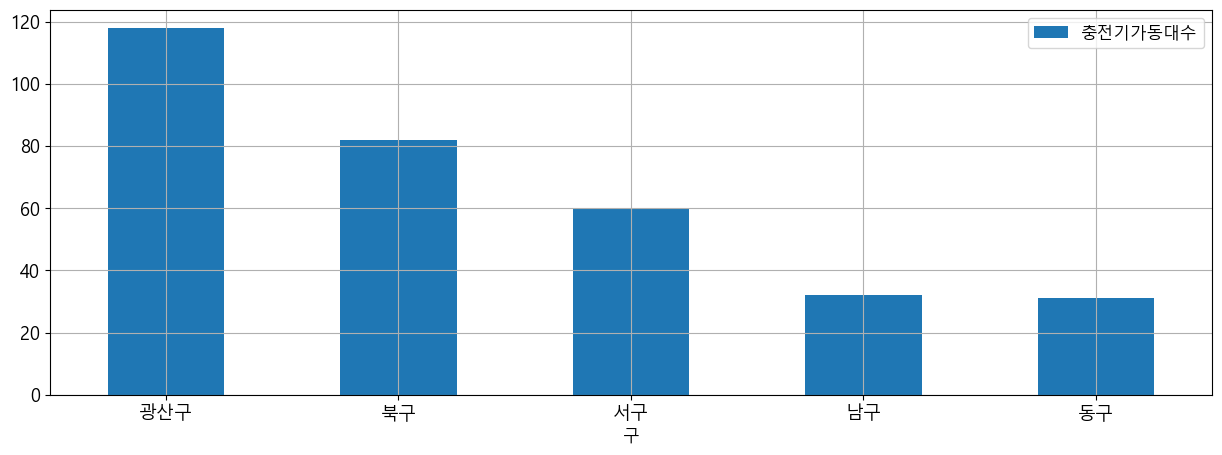

In [439]:
# 2021년 광주광역시 자치구별 충전기가동대수 총합을 시각화합니다.

chargergjcount21_df.plot.bar(grid = True, figsize=(15,5), fontsize=13)
plt.xticks(rotation = 360)
plt.yticks(y = '충전기가동대수')


In [413]:
chargegjdistcount_df = chargegj21_distdd_df['구'].value_counts()

In [414]:
# 2021년도 광주광역시 전체 전기차 충전소 가동 현황을 더합니다.

chargegj21_distdd_df['구'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 63        광산구
80         북구
81         남구
84         북구
94         북구
         ... 
771349     서구
839632     남구
848101     동구
929567     동구
971009     서구
Name: 구, Length: 323, dtype: object>

In [415]:
# 2021년도 광주광역시 자치구별 전기차 충전소 가동률을 구합니다.

np.round(chargegj21_distdd_df['구'].value_counts().div(323), 2)

광산구    0.37
북구     0.25
서구     0.19
남구     0.10
동구     0.10
Name: 구, dtype: float64

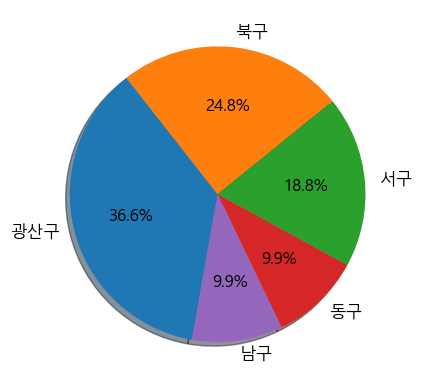

In [416]:
# 2021년도 전기차 충전소 자치구별 가동 비율을 원형그래프로 시각화합니다.(광주 자치구 기준, 한국전력, 환경부 설치)

ratio = [37, 25, 19, 10, 10]
labels = ['광산구', '북구', '서구', '동구', '남구']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)
plt.show()

In [417]:
# 2021년도 광주광역시 전기차 충전소에서 가동된 급속, 완속 충전기의 합을 구합니다.

print(chargegj21_distdd_df['충전기구분'].value_counts())

급속    190
완속    133
Name: 충전기구분, dtype: int64


<AxesSubplot:>

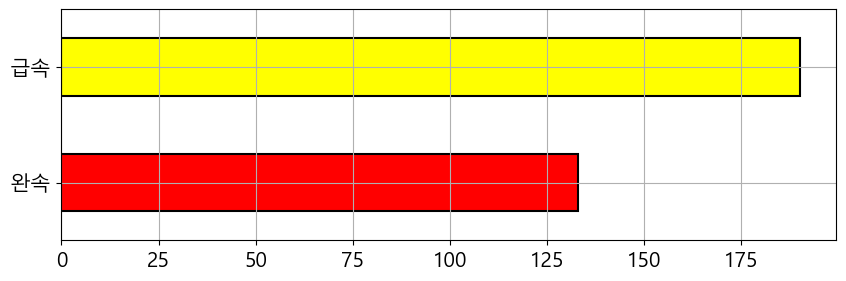

In [418]:
# 2021년도 충전기 가동 현황 총합 (완속, 급속)

chargergj21dist = pd.value_counts(chargegj21_distdd_df['충전기구분'].values, sort=True, ascending = True)
chargergj21dist.plot.barh()
chargergj21dist.plot.barh(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 1.5, figsize=(10,3), fontsize=15)

In [419]:
# 2021년도 광주광역시 자치구별, 충전기구분별 데이터 프레임을 추출합니다.

chargergj21_df = chargegj21_distdd_df[['구', '충전기구분']]
chargergj21_df = chargergj21_df.groupby(["구", "충전기구분"]).size()
pd.DataFrame(chargergj21_df)

0
구   충전기구분    
광산구 급속     58
    완속     60
남구  급속     21
    완속     11
동구  급속     17
    완속     14
북구  급속     54
    완속     28
서구  급속     40
    완속     20

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(광산구, 급속)'),
  Text(1, 0, '(광산구, 완속)'),
  Text(2, 0, '(남구, 급속)'),
  Text(3, 0, '(남구, 완속)'),
  Text(4, 0, '(동구, 급속)'),
  Text(5, 0, '(동구, 완속)'),
  Text(6, 0, '(북구, 급속)'),
  Text(7, 0, '(북구, 완속)'),
  Text(8, 0, '(서구, 급속)'),
  Text(9, 0, '(서구, 완속)')])

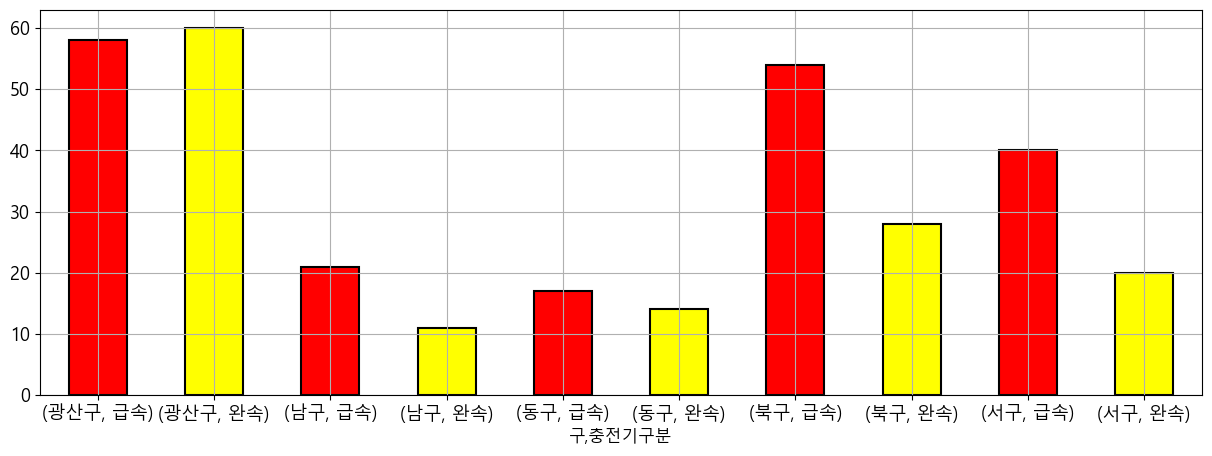

In [420]:
# 2021년도 광주광역시 자치구별 충전기 가동 현황을  시각화합니다. (구, 급속, 완속)

chargergj21_df.plot.bar()
chargergj21_df.plot.bar(grid = True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 1.5, figsize=(15,5), fontsize=13)
plt.xticks(rotation = 360)

In [421]:
# chardatagj2101_df
# chardatagj2102_df

In [422]:
# 2021년도 광주광역시 자치구별 충전소 가동 상반기 하반기 데이터를 병합합니다. 

chargecountgj21_df = pd.concat([chardatagj2101_df, chardatagj2102_df])

In [423]:
chargecountgj21_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
63,광주전남,광산,수완 우미린 1차아파트,완속02,"광주광역시 광산구 수완로33번길 22 (수완동, 수완1차우미린아파트)",완속,7.0,29.9500,5,10,2021-01-01,2021-01-01 18:44:57,2021-01-01 23:54:58,광산구
80,광주전남,광주전남직할,장등공용차고지,급속03,광주광역시 북구 장운길 55 (장등동),급속,200.0,14.3105,0,17,2021-01-01,2021-01-01 22:05:59,2021-01-01 22:23:37,북구
81,광주전남,서광주,보훈병원 주차장,급속01,"광주광역시 남구 서문대로824번길 10 (주월동, (구)광주보훈병원)",급속,50.0,27.3800,1,41,2021-01-01,2021-01-01 18:42:59,2021-01-01 20:24:58,남구
84,광주전남,광주전남직할,장등공용차고지,급속04,광주광역시 북구 장운길 55 (장등동),급속,200.0,65.2295,0,40,2021-01-01,2021-01-01 21:46:13,2021-01-01 22:26:25,북구
94,광주전남,광주전남직할,일곡롯데아파트,완속02,"광주광역시 북구 설죽로 595 (일곡동, 롯데아파트)",완속,7.0,20.4300,3,46,2021-01-01,2021-01-01 19:52:29,2021-01-01 23:38:58,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048451,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,35.5500,0,40,2021-10-17,2021-10-17 11:22:58,2021-10-17 12:03:47,서구
1048453,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,28.4900,0,17,2021-10-17,2021-10-17 11:55:10,2021-10-17 12:12:11,북구
1048456,광주전남,광산,수완동 행정복지센터,급속01,"광주광역시 광산구 장덕로 158 (수완동, 수완동행정복지센터/수완보건지소)",급속,50.0,68.7800,2,14,2021-10-17,2021-10-17 10:19:13,2021-10-17 12:33:33,광산구
1048493,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,50.9900,0,59,2021-10-17,2021-10-17 07:22:48,2021-10-17 08:22:10,서구


In [424]:
# 2021년도 전기차 충전소 사용 빈도 현황(광주 자치구 기준, 한국전력, 환경부)

print(chargecountgj21_df['구'].value_counts())

북구     33057
광산구    18554
서구     15118
동구      7584
남구      4348
Name: 구, dtype: int64


<AxesSubplot:>

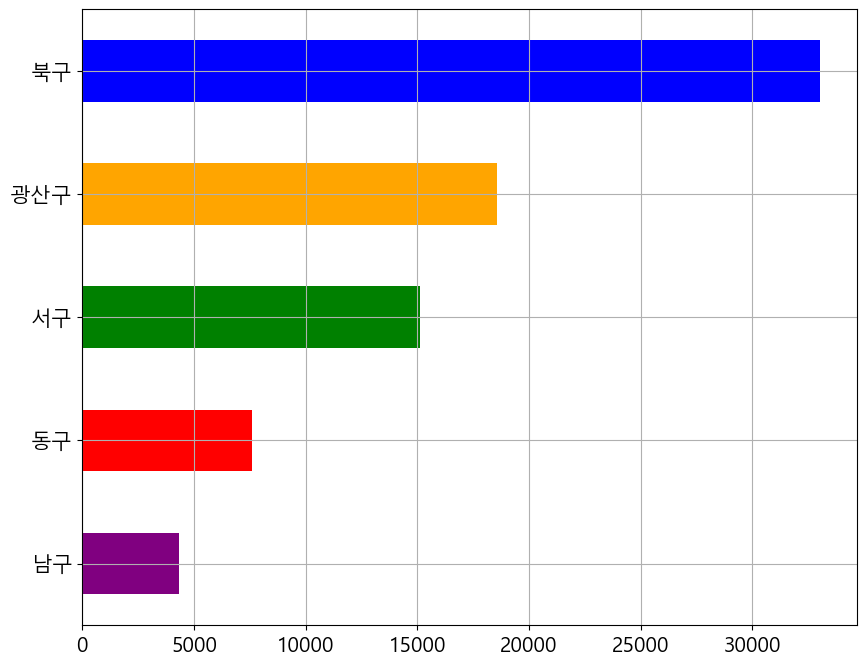

In [425]:
# 2021년도 상반기 전기차 충전소 사용 빈도 시각화

chargecountgj21_df = pd.value_counts(chargecountgj21_df['구'].values, sort=True, ascending = True)
chargecountgj21_df.plot.barh()
chargecountgj21_df.plot.barh(grid=True, color = ['purple', 'red', 'green', 'orange', 'blue'], figsize=(10, 8), fontsize=15)